# Text Corpora in NLTK

## ... and Conditional Frequency Distributions

# Outline

* Gutenberg Corpus 
* Brown Corpus
* Reuters Corpus
* Inaugural Address Corpus 
* Other Corpora 

* Practical work in NLP typically uses large bodies of linguistic data
* Researchers have assembled **corpora** (plural)
  * **corpus** (singular)
* Many corpora are designed to contain a balance of material in multiple genres 
* Questions:
  * What are some useful text corpora and lexical resources?
  * How are they accessed with NLTK?
  * Which Python constructs are most helpful for this work? 

## Project Gutenberg

* Electronic text archive that contains 50,000 free electronic books 
* http://www.gutenberg.org

In [1]:
import nltk

In [3]:
nltk.download("gutenberg")

[nltk_data] Downloading package gutenberg to /home/nbuser/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [4]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt') 

In [6]:
len(emma) 

192427

Some built-in NLTK functions (such as `concordance`) require an `nltk.Text` object:

In [7]:
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))

In [8]:
emma.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

## `raw()`, `words()`, `sents()` methods

Each NLTK corpus contains these methods:
1. `raw` returns the entire corpus/book/article without any linguistic processing. Can calculate the number of letters in the text. 
1. `words` returns an ordered list of words in the text. Can use `len` to return number of words in the text. **word segmentation** 
1. `sents` returns a list of lists: each sentence is a list. Can use `len` with list comprehensions to find shortest or longest sentence. **sentence segmentation** 
1. some corpora contain additional information, such as part-of-speech tags (e.g. what the nouns and verbs are in a sentence) 

In [9]:
from nltk.corpus import gutenberg

In [11]:
gutenberg.raw('austen-emma.txt')[:30]

'[Emma by Jane Austen 1816]\n\nVO'

In [12]:
gutenberg.words('austen-emma.txt')[:30]

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed']

In [14]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
gutenberg.sents('austen-emma.txt')[:5]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

### Example: Displaying average word length, average sentence length, lexical diversity:

_What can you say about the different texts?_

In [16]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
    print(int(num_chars/num_words), int(num_words/num_sents), int(num_words/num_vocab), fileid)

4 24 26 austen-emma.txt
4 26 16 austen-persuasion.txt
4 28 22 austen-sense.txt
4 33 79 bible-kjv.txt
4 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 17 12 burgess-busterbrown.txt
4 20 12 carroll-alice.txt
4 20 11 chesterton-ball.txt
4 22 11 chesterton-brown.txt
4 18 10 chesterton-thursday.txt
4 20 24 edgeworth-parents.txt
4 25 15 melville-moby_dick.txt
4 52 10 milton-paradise.txt
4 11 8 shakespeare-caesar.txt
4 12 7 shakespeare-hamlet.txt
4 12 6 shakespeare-macbeth.txt
4 36 12 whitman-leaves.txt


1. word length appears to be a general property of English 

average word length is really 3, not 4, since `num_chars` variable in for loop on previous slide counts space characters 

2. average sentence length and lexical diversity appear to be characteristics of particular authors 

### Brown Corpus

* First million-word electronic corpus of English 
* Created in 1961 at Brown University
  * Original data was stored on punch cards!
* Corpus contains text from 500 <u>samples</u>, 15 genres
  * Genre categories: (e.g. news, editorial, reviews, government) 
* Each sample: begins at a random sentence boundary, and continues up to the first sentence boundary after 2,000 words.

The Brown Corpus is a convenient resource for studying differences between genres – a linguistic inquiry known as **stylistics**. 

### Example Document for each Section of Brown Corpus

| ID | File | Genre | Description |
| --- | --- | --- | --- |
| A16 | ca16 | news | Chicago Tribune: Society Reportage |
| B02 | cb02 | editorial | Christian Science Monitor: Editorials |
| C17 | cc17 | reviews | Time Magazine: Reviews |
| D12 | cd12 | religion | Underwood: Probing the Ethics of Realtors |
| E36 | ce36 | hobbies | Norling: Renting a Car in Europe |
| F25 | cf25 | lore | Boroff: Jewish Teenage Culture |
| G22 | cg22 | belles_lettres | Reiner: Coping with Runaway Technology |
| H15 | ch15 | government | US Office of Civil and Defence Mobilization: The Family Fallout Shelter |
| J17 | cj19 | learned | Mosteller: Probability with Statistical Applications |
| K04 | ck04 | fiction | W.E.B. Du Bois: Worlds of Color |
| L13 | cl13 | mystery | Hitchens: Footsteps in the Night |
| M01 | cm01 | science_fiction | Heinlein: Stranger in a Strange Land |
| N14 | cn15 | adventure | Field: Rattlesnake Ridge |
| P12 | cp12 | romance | Callaghan: A Passion in Rome |
| R06 | cr06 | humor | Thurber: The Future, If Any, of Comedy |

### Reuters Corpus

* Contains 10,788 news documents totaling 1.3 million words
* Documents classified into 90 topics 
* Grouped into **training set** and **testing set** (for machine learning) 
  * Task: automatically detect topic(s) of a document? 
* Unlike the Brown Corpus, categories in the Reuters Corpus overlap with each other 
  * news story often covers multiple topics
* NLTK Reuters Corpus: “Reuters-21578”: 43MB
* Full corpus size: 3.7GB uncompressed 
  * “The Reuters Corpus Volume 1 (RCV1)”
  * 800,000 manually categorized newswire stories
  * http://trec.nist.gov/data/reuters/reuters.html

### Example: Corpus Methods with Reuters

#### Asking for topics covered by one of more documents, or documents included in one or more categories 

In [17]:
nltk.download("reuters")

[nltk_data] Downloading package reuters to /home/nbuser/nltk_data...


True

In [18]:
from nltk.corpus import reuters

In [19]:
reuters.categories('training/9865')

['barley', 'corn', 'grain', 'wheat']

In [20]:
reuters.categories(['training/9865', 'training/9880'])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [ ]:
reuters.fileids('barley')

In [21]:
reuters.fileids(['barley', 'corn'])

['test/14832',
 'test/14858',
 'test/15033',
 'test/15043',
 'test/15106',
 'test/15287',
 'test/15341',
 'test/15618',
 'test/15648',
 'test/15649',
 'test/15676',
 'test/15686',
 'test/15720',
 'test/15728',
 'test/15845',
 'test/15856',
 'test/15860',
 'test/15863',
 'test/15871',
 'test/15875',
 'test/15877',
 'test/15890',
 'test/15904',
 'test/15906',
 'test/15910',
 'test/15911',
 'test/15917',
 'test/15952',
 'test/15999',
 'test/16012',
 'test/16071',
 'test/16099',
 'test/16147',
 'test/16525',
 'test/16624',
 'test/16751',
 'test/16765',
 'test/17503',
 'test/17509',
 'test/17722',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18035',
 'test/18263',
 'test/18482',
 'test/18614',
 'test/18908',
 'test/18954',
 'test/18973',
 'test/19165',
 'test/19275',
 'test/19668',
 'test/19721',
 'test/19821',
 'test/20018',
 'test/20366',
 'test/20637',
 'test/20645',
 'test/20649',
 'test/20723',
 'test/20763',
 'test/21091',
 'test/21243',
 'test/21493',
 'training/10120',
 'trai

#### Asking for words in a file (titles are uppercased) 

In [22]:
reuters.words('training/9865')[:14]

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export']

### Inaugural Address Corpus

* Treated as a single text by Chapter 1 of NLTK book 
* Corpus is actually collection of 55 texts 
  * one for each presidential address
* interesting project of collection because of its time dimension 
  * time dimension is given in filename 

In [23]:
nltk.download("inaugural")

[nltk_data] Downloading package inaugural to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

In [24]:
from nltk.corpus import inaugural

In [25]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

#### Q: How to extract years of address in the corpus?

In [26]:
[fileid[:4] for fileid in inaugural.fileids()]

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009',
 '2013',
 '2017']

### Other Corpora Distributed with NLTK

| Corpus | Contents |
| --- | --- |
| Genesis | 6 texts, 200k words, 6 languages |
| Indian POS Tagged Corpus | 60k words, tagged (Bangla, Hindi, Marathi, Telugu) |
| Movie Reviews | 2k movie reviews with sentiment polarity classification |
| Names Corpus | 8k male and female names |
| NPS Chat Corpus | 10k IM chat posts, POS and dialogue-act tagged |
| Question Classification | 6k questions, categorized |
| Roget’s Thesaurus | 200k words, formatted text |

* See NLTK Book, Ch. 2, Table 1.2 for complete list
* It’s also possible to load your own corpus

<hr>

# More Python and NLTK: Conditional Frequency Distributions

* `FreqDist` vs. `ConditionalFreqDist` 
* Input to a `ConditionalFreqDist` 
* Creating and Accessing 
* Plotting and Tabulating Distributions 

## Frequency Distribution

**Frequency Distribution** - counting number of occurrences of each item in a list

Usage: `FreqDist(mylist)` 

<img src="https://www.nltk.org/images/tally.png" width=300 />

In [27]:
fd = nltk.FreqDist(gutenberg.words('austen-emma.txt')[:2000])
fd

FreqDist({'!': 2,
          '!"': 2,
          '!--': 3,
          '"': 9,
          "'": 12,
          '(': 1,
          ')': 1,
          ',': 125,
          '-': 10,
          '--': 8,
          '.': 62,
          '."': 5,
          '.--': 2,
          '1816': 1,
          ':': 2,
          ';': 27,
          ';--': 2,
          '?': 2,
          '?"': 2,
          '?--': 1,
          'A': 2,
          'All': 1,
          'And': 2,
          'Austen': 1,
          'Between': 1,
          'Brunswick': 1,
          'But': 2,
          'CHAPTER': 1,
          'Christmas': 1,
          'Emma': 10,
          'Even': 1,
          'Hannah': 2,
          'Hartfield': 4,
          'He': 5,
          'Her': 3,
          'Highbury': 2,
          'His': 1,
          'How': 2,
          'I': 17,
          'Isabella': 3,
          'It': 6,
          'James': 5,
          'Jane': 1,
          'Knightley': 1,
          'London': 2,
          'Matrimony': 1,
          'Miss': 13,
          'Mr': 8,


### Conditional Frequency Distributions

* What about texts that are divided into several categories? 
* Able to study systematic differences between the categories by maintaining separate frequency distributions for each category. 
* NLTK Class: `ConditionalFreqDist`

<img src="https://www.nltk.org/images/tally2.png" width=500 />

#### What python data structure is “under-the-hood”?

A dictionary of dictionaries! 

### `ConditionalFreqDist()`

* `nltk.ConditionalFreqDist()` takes a list of pairs 
* each pair is a tuple of the form `(condition, event)`

_Pattern_: `pairs = [(’news’, ’The’), (’news’, ’Fulton’), (’news’, ’County’), ...]` 

### Example: Making a list of pairs from the Brown Corpus 

In [29]:
nltk.download("brown")

[nltk_data] Downloading package brown to /home/nbuser/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [30]:
from nltk.corpus import brown

In [31]:
genre_word = [(genre, word)
    for genre in ['news', 'romance']
    for word in brown.words(categories=genre)]

Complicated List Comprehension:
1. For every genre
2. Loop over every word in that genre
3. Extend the list with a new tuple of form `(genre, word)`

In [36]:
len(genre_word)

170576

Pairs at the beginning of the list will be the ‘news’ genre; the latter half will be ‘romance’:

In [37]:
genre_word[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [38]:
genre_word[-4:]

[('romance', 'afraid'),
 ('romance', 'not'),
 ('romance', "''"),
 ('romance', '.')]

Creating a ConditionalFreqDist and verifying that there are two conditions: 

In [39]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'news': FreqDist({'tribesmen': 1,
                               'licensing': 2,
                               'Alvin': 3,
                               'grin': 1,
                               'witnessed': 1,
                               'produce': 7,
                               'Guard': 3,
                               'unsatisfactory': 1,
                               'revenues': 13,
                               'western': 1,
                               'contact': 3,
                               'Tex': 1,
                               'JA': 1,
                               'top': 34,
                               'territory': 3,
                               'statues': 1,
                               'slogan': 1,
                               'take': 48,
                               'talents': 2,
                               'doubled': 7,
                               'preclude': 1,
    

In [40]:
cfd.conditions()

['romance', 'news']

Each condition is just a frequency distribution:

In [41]:
cfd['news']

FreqDist({'tribesmen': 1,
          'licensing': 2,
          'Alvin': 3,
          'grin': 1,
          'witnessed': 1,
          'produce': 7,
          'Guard': 3,
          'unsatisfactory': 1,
          'revenues': 13,
          'western': 1,
          'contact': 3,
          'Tex': 1,
          'JA': 1,
          'top': 34,
          'territory': 3,
          'statues': 1,
          'slogan': 1,
          'take': 48,
          'talents': 2,
          'doubled': 7,
          'preclude': 1,
          '3-to-3': 1,
          'hence': 1,
          'marveled': 1,
          'wood': 1,
          'Thakhek': 1,
          'Verboort': 1,
          'Crosby': 4,
          'Banks': 1,
          'breakdown': 4,
          'first-class': 1,
          'Chiuchow': 1,
          'larceny': 1,
          'Attorneys': 2,
          'economize': 1,
          'pre-school': 1,
          'pray': 1,
          'engaged': 3,
          'Samuel': 9,
          'Fundamental': 1,
          'Slocum': 1,
          'Blu

In [42]:
cfd['romance']

FreqDist({'brace': 4,
          'produce': 1,
          'Samuel': 4,
          'sentinel': 1,
          'twinkling': 1,
          'top': 8,
          'territory': 2,
          'Sometime': 1,
          'cigars': 1,
          'loose': 2,
          'pyramid': 1,
          'eyes': 76,
          'wood': 5,
          'sprawled': 2,
          'Via': 10,
          'knot': 1,
          'engaged': 1,
          'remembering': 1,
          'daydreamed': 1,
          'holidays': 1,
          'lips': 11,
          'carried': 7,
          'sink': 3,
          'wallow': 1,
          'discreet': 1,
          'maybe': 15,
          'process': 1,
          'complete': 3,
          'kitten': 2,
          'eyeballs': 1,
          'ground': 8,
          'theater': 2,
          'stopped': 25,
          'confessed': 1,
          'skilled': 1,
          'rise': 5,
          'recall': 3,
          "Racin'": 1,
          'takes': 1,
          'moss': 1,
          'wretched': 3,
          'landing': 1,
          

In [43]:
list(cfd['romance'])

['take',
 'judging',
 'brace',
 'barn',
 'bones',
 'produce',
 'nuzzled',
 'interests',
 'watched',
 'hoofs',
 'Art',
 'settle',
 'twinkling',
 'I',
 'Then',
 'top',
 'mammas',
 'innings',
 'Sometime',
 'cigars',
 'boarding-home',
 'hairy',
 'desiring',
 'pyramid',
 'muttered',
 'lady',
 'crude',
 'float',
 'willing',
 'readily',
 'wood',
 'pinch-hit',
 'underwear',
 'Plastic',
 'sprawled',
 'Via',
 'neglected',
 'engaged',
 'remembering',
 'daydreamed',
 'Dartmouth',
 'Watching',
 'Ash',
 'opened',
 'Yet',
 "Horne's",
 'Heavy',
 'lips',
 'reinforce',
 'carried',
 'sink',
 'wallow',
 'contest',
 'midwife',
 'nest',
 'maybe',
 'process',
 "d'un",
 'buckles',
 'complete',
 'President',
 'Hetty',
 'same',
 'understands',
 '10',
 'discuss',
 'ground',
 'cane',
 'stepped',
 'Nurse',
 'training',
 'personal',
 'theater',
 'Bryan',
 'stopped',
 'confessed',
 'buckets',
 'skilled',
 'rise',
 'relaxes',
 'recall',
 'frightening',
 "Racin'",
 'takes',
 'his',
 'moss',
 'pall',
 'trip',
 'penetra

In [45]:
cfd['romance']['could']

193

### Plotting Distributions

`plot():` plots a ConditionalFrequencyDistribution 
* each line series is a condition
* x-axis: frequency distribution keys
* y-axis: values (the word counts) 

In [47]:
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:4])
           for fileid in inaugural.fileids()
           for w in inaugural.words(fileid)
           for target in ['america', 'citizen']
           if w.lower().startswith(target))

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


<IPython.core.display.Javascript object>


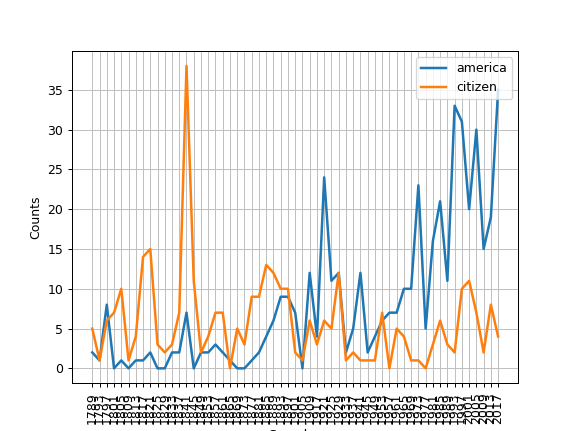

In [48]:
%matplotlib notebook

cfd.plot()

_Q: Why does it work?_

* generates pairs such as `(’america’, ’1865’)`
* exploits the fact that corpus is divided into filenames of form 1865-Lincoln.txt 
* where is the exploit? 
  * `fileid[:4]`
* What other words will be counted? 
  * Americans

### Tabulating Distributions

`tabulate():` tabulates a Conditional Frequency Distribution

* optionally specify which conditions to display with `conditions=` parameter
* optionally limit sample to display with `samples=` parameter 

Comparing genres in their usage of modal verbs:

In [49]:
cfd = nltk.ConditionalFreqDist(
           (genre, word)
           for genre in brown.categories()
           for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor'] 
modals = ['can', 'could', 'may', 'might', 'must', 'will'] 
cfd.tabulate(conditions=genres, samples=modals) 

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


### Other NLTK `ConditionalDistFreq` methods:

| Example | Description |
| --- | --- |
| cfdist = ConditionalFreqDist(pairs) | create a conditional frequency distribution from a list of pairs |
| cfdist.conditions() | alphabetically sorted list of conditions |
| cfdist[condition] | the frequency distribution for this condition |
| cfdist[condition][sample] | frequency for the given sample for this condition |
| cfdist.tabulate() | tabulate the conditional frequency distribution |
| cfdist.tabulate(samples, conditions) | tabulation limited to the specified samples and conditions |
| cfdist.plot() | graphical plot of the conditional frequency distribution |
| cfdist.plot(samples, conditions) | graphical plot limited to the specified samples and conditions |
| cfdist1 < cfdist2 | test if samples in cfdist1 occur less frequently than in cfdist2 |